Pair: Acton Town to South Ealing, Dijkstra Time: 0.000130, A* Time: 0.000043
Pair: Arsenal to Latimer Road, Dijkstra Time: 0.000361, A* Time: 0.000219
Pair: Chesham to Plaistow, Dijkstra Time: 0.000322, A* Time: 0.000281
Pair: Baker Street to Regent's Park, Dijkstra Time: 0.000035, A* Time: 0.000035
Pair: Bank to Woodford, Dijkstra Time: 0.000243, A* Time: 0.000206
Pair: Baker Street to Embankment, Dijkstra Time: 0.000141, A* Time: 0.000070
Pair: Aldgate East to Whitechapel, Dijkstra Time: 0.000031, A* Time: 0.000028
Pair: Heathrow Terminals 1, 2 & 3 to Canary Wharf, Dijkstra Time: 0.000294, A* Time: 0.000347
Pair: Wembley Park to Stratford, Dijkstra Time: 0.000577, A* Time: 0.000308
Pair: Epping to Wimbledon, Dijkstra Time: 0.000313, A* Time: 0.000354
Pair: Brixton to Oxford Circus, Dijkstra Time: 0.000068, A* Time: 0.000057
Pair: Watford to Moorgate, Dijkstra Time: 0.000198, A* Time: 0.000196


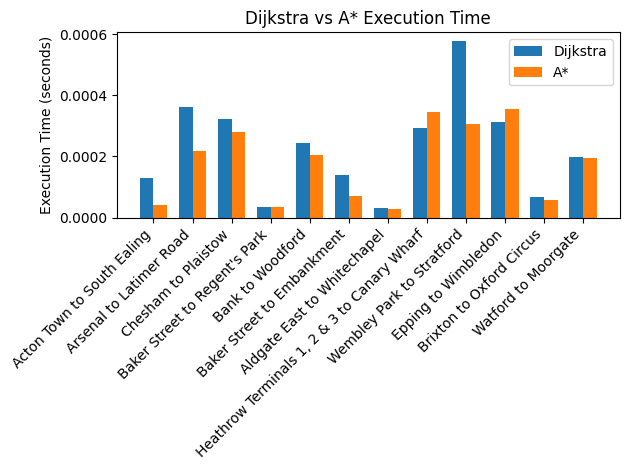

Pair: Acton Town to South Ealing, Dijkstra Line Changes: 0, A* Line Changes: 0
Pair: Arsenal to Latimer Road, Dijkstra Line Changes: 3, A* Line Changes: 3
Pair: Chesham to Plaistow, Dijkstra Line Changes: 3, A* Line Changes: 3
Pair: Baker Street to Regent's Park, Dijkstra Line Changes: 0, A* Line Changes: 0
Pair: Bank to Woodford, Dijkstra Line Changes: 0, A* Line Changes: 0
Pair: Baker Street to Embankment, Dijkstra Line Changes: 2, A* Line Changes: 2
Pair: Aldgate East to Whitechapel, Dijkstra Line Changes: 0, A* Line Changes: 0
Pair: Heathrow Terminals 1, 2 & 3 to Canary Wharf, Dijkstra Line Changes: 2, A* Line Changes: 2
Pair: Wembley Park to Stratford, Dijkstra Line Changes: 2, A* Line Changes: 2
Pair: Epping to Wimbledon, Dijkstra Line Changes: 5, A* Line Changes: 5
Pair: Brixton to Oxford Circus, Dijkstra Line Changes: 0, A* Line Changes: 0
Pair: Watford to Moorgate, Dijkstra Line Changes: 1, A* Line Changes: 1


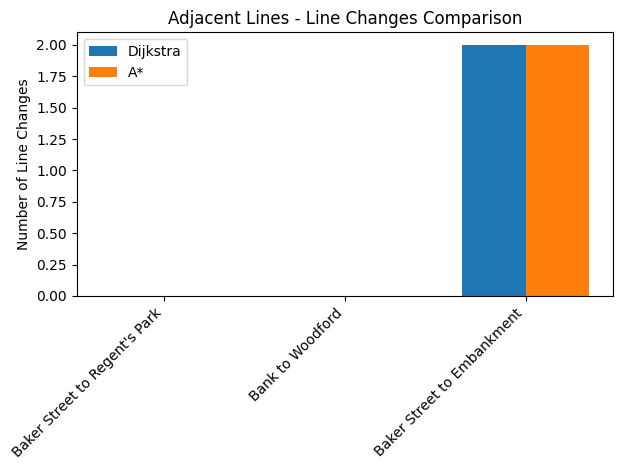

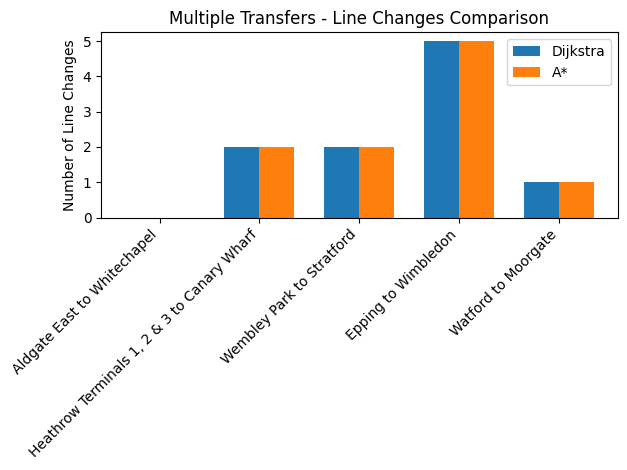

In [3]:

import csv
from math import radians, sqrt
import time
import matplotlib.pyplot as plt


class PriorityQueue:
    def __init__(self):
        self.elements = []

    def is_empty(self):
        return not self.elements

    def put(self, item, priority):
        self.elements.append((priority, item))
        self.elements.sort(reverse=True)

    def get(self):
        return self.elements.pop()[1]  
    
def dijkstra(graph, start, end):
    """
    Finds the shortest path from start to end using Dijkstra's algorithm.
    
    Parameters:
    - graph: The graph representation as a dict of dicts.
    - start: The starting node ID.
    - end: The ending node ID.
    
    Returns:
    - The shortest distance from start to end.
    - The path as a list of node IDs from start to end.
    """
    distance = {vertex: float('infinity') for vertex in graph}
    distance[start] = 0
    predecessor = {vertex: None for vertex in graph}
    pq = PriorityQueue()
    pq.put(start, 0)
    
    while not pq.is_empty():
        current_node = pq.get()
        
        if current_node == end:
            break

        for neighbor, weight in graph[current_node].items():
            alt_route = distance[current_node] + weight
            if alt_route < distance[neighbor]:
                distance[neighbor] = alt_route
                predecessor[neighbor] = current_node
                pq.put(neighbor, alt_route)
                
    # Reconstruct path from end to start using predecessors
    path = []
    current = end
    while current is not None:
        path.append(current)
        current = predecessor[current]
    path.reverse()  # Reverse the path to start from the beginning
    
    return distance[end], path



def euclidean_distance(coord1, coord2):
    """
    Calculate the Euclidean distance between two points in a plane.
    
    Parameters:
    - coord1: Tuple containing (latitude, longitude) of the first point.
    - coord2: Tuple containing (latitude, longitude) of the second point.
    
    Returns:
    - The Euclidean distance between the two points.
    """
    lat1, lon1 = coord1
    lat2, lon2 = coord2
    
    # Convert latitudes and longitudes from degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    
    # Calculate differences
    delta_lat = lat2 - lat1
    delta_lon = lon2 - lon1
    
    # Simplify: Treat these differences as Cartesian distances
    # Note: This is a rough approximation and works better for short distances
    distance = sqrt(delta_lat**2 + delta_lon**2)
    
    return distance


def heuristic(station_id, destination_id):
    station_coord = (stations[station_id]['latitude'], stations[station_id]['longitude'])
    destination_coord = (stations[destination_id]['latitude'], stations[destination_id]['longitude'])
    return euclidean_distance(station_coord, destination_coord)

def A_Star(graph, source, destination, heuristic):

    open_set = PriorityQueue()
    open_set.put(source, 0 + heuristic(source, destination))  # Corrected this line
    predecessors = {source: None}
    actual_costs = {source: 0}

    while not open_set.is_empty():
        current_node = open_set.get()

        if current_node == destination:
            break  # When the destination is reached, exit the loop

        for neighbor, weight in graph[current_node].items():
            tentative_cost = actual_costs[current_node] + weight
            if neighbor not in actual_costs or tentative_cost < actual_costs[neighbor]:
                actual_costs[neighbor] = tentative_cost
                # Calculate total cost as the sum of actual cost so far and heuristic estimate to the goal
                total_cost = tentative_cost + heuristic(neighbor, destination)
                open_set.put(neighbor, total_cost)
                predecessors[neighbor] = current_node

    return predecessors, reconstruct_path(predecessors, source, destination)

def reconstruct_path(predecessors, start, end):
        if end not in predecessors:
            return []  # Path not found
        path = []
        while end is not None:
            path.append(end)
            end = predecessors.get(end)
        path.reverse()
        return path  


def parse_stations(file_path):
    """
    Parses the stations CSV file and returns a dictionary of stations.
    
    Parameters:
    - file_path: The path to the stations CSV file.
    
    Returns:
    - A dictionary where keys are station IDs and values are dictionaries
      containing latitude, longitude, and name of the station.
    """
    stations = {}
    with open(file_path, mode='r', encoding='utf-8') as infile:
        reader = csv.DictReader(infile)
        for row in reader:
            station_id = int(row["id"])
            stations[station_id] = {
                "latitude": float(row["latitude"]),
                "longitude": float(row["longitude"]),
                "name": row["name"]
            }
    return stations


def parse_connections(file_path):
    """
    Parses the connections CSV file and returns a list of connections.
    
    Parameters:
    - file_path: The path to the connections CSV file.
    
    Returns:
    - A list of tuples, each representing a connection between two stations.
      Each tuple contains (station1, station2, line, time).
    """
    connections = []
    with open(file_path, mode='r', encoding='utf-8') as infile:
        reader = csv.reader(infile)
        next(reader)  # Skip the header
        for row in reader:
            connection = (int(row[0]), int(row[1]), int(row[2]), float(row[3]))
            connections.append(connection)
    return connections

stations_file_path = 'london_stations.csv'
connections_file_path = 'london_connections.csv'

stations = parse_stations(stations_file_path)
connections = parse_connections(connections_file_path)



def build_graph(connections):
    """
    Builds a graph from a list of connections.
    Each connection is a tuple (station1, station2, time).

    Parameters:
    - connections: A list of tuples, where each tuple contains
      (station1, station2, time).

    Returns:
    - A dictionary representing the graph, where keys are station IDs
      and values are dictionaries of neighboring stations and their respective times.
    """
    graph = {}

    for station1, station2, _, time in connections:
        # Initialize station1 and station2 in graph if they don't exist
        if station1 not in graph:
            graph[station1] = {}
        if station2 not in graph:
            graph[station2] = {}

        # Add the edge from station1 to station2 and vice versa
        graph[station1][station2] = time
        graph[station2][station1] = time  # Assuming bidirectional connections

    return graph


graph = build_graph(connections)

def measure_performance(graph, start_id, end_id, heuristic):
    # Measure Dijkstra's algorithm performance
    start_time = time.time()
    dijkstra(graph, start_id, end_id)
    dijkstra_time = time.time() - start_time

    # Measure A* algorithm performance
    start_time = time.time()
    A_Star(graph, start_id, end_id, heuristic)
    astar_time = time.time() - start_time

    return dijkstra_time, astar_time


def count_line_changes(path, connections):
    station_pairs_to_lines = {}
    for conn in connections:
        station1, station2, line, _ = conn
        station_pairs_to_lines.setdefault((station1, station2), set()).add(line)
        station_pairs_to_lines.setdefault((station2, station1), set()).add(line)

    line_changes = 0
    current_line = None
    for i in range(len(path) - 1):
        station1, station2 = path[i], path[i + 1]
        possible_lines = station_pairs_to_lines.get((station1, station2), set())
        
        if not possible_lines.intersection({current_line}):
            current_line = possible_lines.pop() if possible_lines else None
            if i > 0:
                line_changes += 1
                
    return line_changes


def plot_performance_comparison(labels, dijkstra_times, astar_times, title='Dijkstra vs A* Execution Time'):
    """
    Plots a comparison of execution times between Dijkstra's and A* algorithms.

    Parameters:
    - labels: List of strings representing the labels for each station pair.
    - dijkstra_times: List of execution times for Dijkstra's algorithm.
    - astar_times: List of execution times for A* algorithm.
    - title: (Optional) Title for the plot.
    """
    x = range(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x, dijkstra_times, width, label='Dijkstra')
    rects2 = ax.bar([p + width for p in x], astar_times, width, label='A*')

    # Add some text for labels, title, and custom x-axis tick labels, etc.
    ax.set_ylabel('Execution Time (seconds)')
    ax.set_title(title)
    ax.set_xticks([p + width / 2 for p in x])
    ax.set_xticklabels(labels, rotation=45, ha='right')
    ax.legend()

    fig.tight_layout()

    plt.show()

    
    
    
station_pairs = [
    (1, 234),  # Short distance
    (10, 150),  # Medium distance
    (50, 200),  # Long distance
    (11, 212),  # Same Line, Short Distance
    (13, 301),  # Same Line, Long Distance
    (11, 87),   # Different Lines, No Transfers
    (3, 295),   # Different Lines, Multiple Transfers
    (117, 42),  # Heathrow Terminals 1, 2 & 3 to Canary Wharf
    (282, 247), # Wembley Park to Stratford
    (88, 299),  # Epping to Wimbledon
    (35, 192),  # Brixton to Oxford Circus
    (280, 167),  # Watford to Moorgate

]

# Collect data
labels = []
dijkstra_times = []
astar_times = []
line_changes_list = []

for start_id, end_id in station_pairs:
    # Adjust to unpack all four returned values
    dijkstra_time,_ = measure_performance(graph, start_id, end_id, lambda x, y: 0)
    astar_time,_ = measure_performance(graph, start_id, end_id, heuristic)
    # Append data to lists for plotting and analysis
    labels.append(f"{stations[start_id]['name']} to {stations[end_id]['name']}")
    dijkstra_times.append(dijkstra_time)
    astar_times.append(astar_time)
    
    # Optionally print out the information for verification
    print(f"Pair: {labels[-1]}, Dijkstra Time: {dijkstra_time:.6f}, A* Time: {astar_time:.6f}")



plot_performance_comparison(labels, dijkstra_times, astar_times)

for (start_id, end_id), label in zip(station_pairs, labels):
    _, dijkstra_path = dijkstra(graph, start_id, end_id)
    _, astar_path = A_Star(graph, start_id, end_id, heuristic)
    
    # Calculate line changes for each path
    dijkstra_line_changes = count_line_changes(dijkstra_path, connections)
    astar_line_changes = count_line_changes(astar_path, connections)
    
    line_changes_list.append((dijkstra_line_changes, astar_line_changes))
    
    # Print using the correct label for each station pair
    print(f"Pair: {label}, Dijkstra Line Changes: {dijkstra_line_changes}, A* Line Changes: {astar_line_changes}")




adjacent_lines_pairs = [
    (11, 212),  # Same Line, Short Distance
    (13, 301),  # Same Line, Long Distance
    (11, 87),   # Different Lines, No Transfers
]

multiple_transfers_pairs = [
    (3, 295),   # Different Lines, Multiple Transfers
    (117, 42),  # Heathrow Terminals 1, 2 & 3 to Canary Wharf
    (282, 247), # Wembley Park to Stratford
    (88, 299),  # Epping to Wimbledon
    (280, 167),  # Watford to Moorgate
]


In [4]:
from abc import ABC, abstractmethod
from typing import Dict, Tuple, List


class Graph(ABC):
    def __init__(self):
        self.edges = {}  # Stores adjacency list
        
    @property
    def nodes(self):
        return list(self.edges.keys())
    
    def add_node(self, node: int):
        if node not in self.edges:
            self.edges[node] = []
    
    def add_edge(self, src: int, dst: int):
        if src not in self.edges:
            self.add_node(src)
        if dst not in self.edges:
            self.add_node(dst)
        self.edges[src].append(dst)
        self.edges[dst].append(src)  # Assuming undirected graph for simplicity

    def get_num_of_nodes(self) -> int:
        return len(self.edges)

    def get_adj_nodes(self, node: int) -> List[int]:
        return self.edges.get(node, [])

    @abstractmethod
    def w(self, node: int) -> float:
        # Abstract method, should be implemented in child classes
        pass

    
class WeightedGraph(Graph):
    def __init__(self):
        super().__init__()
        self.edges = {}  # Overrides the base class to use a dict for weighted edges

    def add_edge(self, src: int, dst: int, weight: float):
        if src not in self.edges:
            self.edges[src] = {}
        if dst not in self.edges:
            self.edges[dst] = {}
        self.edges[src][dst] = weight
        self.edges[dst][src] = weight  # Assuming undirected graph for simplicity

    def w(self, node1: int, node2: int) -> float:
        try:
            return self.edges[node1][node2]
        except KeyError:
            return float('inf')  # No edge exists



class HeuristicGraph(WeightedGraph):
    def __init__(self, heuristic: Dict[int, float]):
        super().__init__()
        self.heuristic = heuristic

    def get_heuristic(self, node): 
        return self.heuristic.get(node, float('inf'))

class SPAlgorithm(ABC):
    def __init__(self, graph: Graph):
        self.graph = graph

    @abstractmethod
    def calc_sp(self, source: int, dest: int) -> Tuple[List[int], float]:
        pass

def dijkstra(graph, start, end):
    distance = {vertex: float('infinity') for vertex in graph}
    distance[start] = 0
    predecessor = {vertex: None for vertex in graph}
    pq = PriorityQueue()
    pq.put(start, 0)
    
    while not pq.is_empty():
        current_node = pq.get()
        
        if current_node == end:
            break

        for neighbor, weight in graph[current_node].items():
            alt_route = distance[current_node] + weight
            if alt_route < distance[neighbor]:
                distance[neighbor] = alt_route
                predecessor[neighbor] = current_node
                pq.put(neighbor, alt_route)
                
    # Reconstruct path from end to start using predecessors
    path = []
    current = end
    while current is not None:
        path.append(current)
        current = predecessor[current]
    path.reverse()  # Reverse the path to start from the beginning
    
    return distance[end], path

class Dijkstra(SPAlgorithm):
    def __init__(self, graph: WeightedGraph):
        super().__init__(graph)

    def calc_sp(self, source: int, dest: int) -> Tuple[List[int], float]:

        adapted_graph = {node: {} for node in self.graph.nodes}
    
        for src_node, neighbors in self.graph.edges.items():
            for dst_node, weight in neighbors.items():
                adapted_graph[src_node][dst_node] = weight
        
        # Running the Dijkstra's algorithm
        distance, path = dijkstra(adapted_graph, source, dest)
        
        return path, distance

class A_Star_Adapter(SPAlgorithm):
    def __init__(self, heuristic_graph: HeuristicGraph):
        super().__init__(heuristic_graph)
        self.heuristic_graph = heuristic_graph

    def calc_sp(self, source: int, dest: int) -> Tuple[List[int], float]:
        graph = {node: {} for node in self.heuristic_graph.nodes}
        for node, neighbors in self.heuristic_graph.edges.items():
            for neighbor in neighbors:
                if neighbor in self.heuristic_graph.edges[node]: 
                    graph[node][neighbor] = self.heuristic_graph.w(node, neighbor)
        
        heuristic = {node: self.heuristic_graph.get_heuristic(node) for node in self.heuristic_graph.nodes}

        _, path = self.a_star_algorithm(graph, source, dest, heuristic)

        if not path:
            return [], float('inf') 

        path_cost = sum([self.heuristic_graph.w(path[i], path[i+1]) for i in range(len(path) - 1)])
        
        return path, path_cost

    def a_star_algorithm(self, graph, source, destination, heuristic):
        open_list = PriorityQueue()
        open_list.put(source, 0 + heuristic[source])
        predecessors = {source: None}
        costs = {source: 0}

        while not open_list.is_empty():
            current = open_list.get()

            if current == destination:
                break

            
            for neighbor, weight in graph[current].items():
                new_cost = costs[current] + weight

                if neighbor not in costs or new_cost < costs[neighbor]:
                    costs[neighbor] = new_cost
                    priority = new_cost + heuristic[neighbor]
                    open_list.put(neighbor, priority)
                    predecessors[neighbor] = current

        path = self.reconstruct_path(predecessors, source, destination)
        if not path:
            return predecessors, [], "Destination not reachable"

        return predecessors, path

    def reconstruct_path(self, predecessors, start, end):
        if end not in predecessors:
            return []  # Path not found
        path = []
        while end is not None:
            path.append(end)
            end = predecessors.get(end)
        path.reverse()  # Reverse the path to start from the beginning
        return path

    
class BellmanFord(SPAlgorithm):
    def calc_sp(self, source: int, dest: int) -> Tuple[List[int], float]:
        # Initialize distance to all vertices as infinite and distance to source as 0
        distances = {v: float('inf') for v in self.graph.nodes}
        predecessors = {v: None for v in self.graph.nodes}
        distances[source] = 0

        # Relax edges repeatedly
        for _ in range(len(self.graph.nodes) - 1):
            for src in self.graph.edges:
                for dst, weight in self.graph.edges[src].items():
                    if distances[src] + weight < distances[dst]:
                        distances[dst] = distances[src] + weight
                        predecessors[dst] = src

        # Check for negative-weight cycles
        for src in self.graph.edges:
            for dst, weight in self.graph.edges[src].items():
                if distances[src] + weight < distances[dst]:
                    raise ValueError("Graph contains a negative-weight cycle")

        # Reconstruct the path from source to dest
        path = []
        current = dest
        while current is not None:
            path.append(current)
            current = predecessors[current]
        path.reverse()

        return path, distances[dest] if distances[dest] != float('inf') else None

class PriorityQueue:
    def __init__(self):
        self.elements = []

    def is_empty(self):
        return not self.elements

    def put(self, item, priority):
        self.elements.append((priority, item))
        self.elements.sort(reverse=True)

    def get(self):
        return self.elements.pop()[1]  


class ShortPathFinder:
    def __init__(self, graph: Graph, algo: SPAlgorithm):
        self.graph = graph
        self.algo = algo

    def calc_short_path(self, source: int, dest: int) -> Tuple[List[int], float]:
        return self.algo.calc_sp(source, dest)

    def set_graph(self, graph: Graph):
        self.graph = graph
        self.algo.graph = graph

    def set_algorithm(self, algo: SPAlgorithm):
        self.algo = algo


"""Detailed testing to ensure that everything is working or not"""
def create_test_graph():
    graph = WeightedGraph()
    graph.add_edge(1, 2, 1.0)
    graph.add_edge(2, 3, 2.0)
    graph.add_edge(3, 4, 3.0)
    graph.add_edge(4, 5, 4.0)
    graph.add_edge(1, 5, 10.0)
    return graph

def create_heuristic_graph():
    heuristic = {1: 9, 2: 7, 3: 4, 4: 2, 5: 0}  # Example heuristic, assuming 5 is the goal
    graph = HeuristicGraph(heuristic)
    graph.add_edge(1, 2, 1.0)
    graph.add_edge(2, 3, 2.0)
    graph.add_edge(3, 4, 3.0)
    graph.add_edge(4, 5, 4.0)
    graph.add_edge(1, 5, 10.0)
    return graph

def test_dijkstra_simple_path():
    graph = create_test_graph()
    dijkstra_algo = Dijkstra(graph)
    finder = ShortPathFinder(graph, dijkstra_algo)
    path, cost = finder.calc_short_path(1, 5)
    print(path, cost)


def test_a_star_simple_path():
    graph = create_heuristic_graph()
    a_star_algo = A_Star_Adapter(graph)
    finder = ShortPathFinder(graph, a_star_algo)
    path, cost = finder.calc_short_path(1, 5)
    print(path, cost)


def test_dijkstra_disconnected_graph():
    graph = WeightedGraph()
    graph.add_edge(1, 2, 1.0)
    graph.add_edge(3, 4, 1.0)  # Disconnected component
    dijkstra_algo = Dijkstra(graph)
    finder = ShortPathFinder(graph, dijkstra_algo)
    path, cost = finder.calc_short_path(1, 4)
    print(path, cost)

def test_bellman_ford_negative_cycle():
    graph = WeightedGraph()
    graph.add_edge(1, 2, 4.0)
    graph.add_edge(2, 3, -6.0)
    graph.add_edge(3, 1, 2.0)
    bellman_ford_algo = BellmanFord(graph)
    finder = ShortPathFinder(graph, bellman_ford_algo)
    try:
        path, cost = finder.calc_short_path(1, 3)
        assert False, "Negative cycle detection failed"
    except ValueError as e:
        assert str(e) == "Graph contains a negative-weight cycle", "Incorrect error message"
    print("Test Case 4 Passed: Bellman-Ford Negative Weight Cycle")

def test_basic_pathfinding():
    # Create a heuristic graph with a straight path from 1 to 5
    heuristic = {1: 4, 2: 3, 3: 2, 4: 1, 5: 0}
    graph = HeuristicGraph(heuristic)
    graph.add_edge(1, 2, 1.0)
    graph.add_edge(2, 3, 1.0)
    graph.add_edge(3, 4, 1.0)
    graph.add_edge(4, 5, 1.0)

    # Instantiate the A* adapter with the heuristic graph
    a_star_algo = A_Star_Adapter(graph)

    # Calculate the shortest path from 1 to 5
    path, cost = a_star_algo.calc_sp(1, 5)

    # Output the result for verification
    print(f"Path: {path}, Cost: {cost}")
    print(path == [1, 2, 3, 4, 5], cost == 4.0)

if __name__ == "__main__":
    test_dijkstra_simple_path()
    test_a_star_simple_path()
    test_dijkstra_disconnected_graph()
    test_bellman_ford_negative_cycle()
    test_basic_pathfinding()


[1, 5] 10.0
[1, 5] 10.0
[4] inf
Test Case 4 Passed: Bellman-Ford Negative Weight Cycle
Path: [1, 2, 3, 4, 5], Cost: 4.0
True True
